<a href="https://colab.research.google.com/github/HackyRoot/Workshop-Content/blob/master/Footprints_2019/6%20-%20TensorFlow%20and%20Keras/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [18]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Inputs and Outputs

So, in this next step, we're just going to create a session. Your x and y_ are just going to place placeholders that basically just indicate the type of input you want in your CNN and the type of output. For each of these placeholders, you have to specify the type and the shape.

In [19]:
tf.reset_default_graph() 
sess = tf.InteractiveSession()
x = tf.placeholder("float", shape = [None, 28,28,1]) #shape in CNNs is always None x height x width x color channels
y_ = tf.placeholder("float", shape = [None, 10]) #shape is always None x number of classes

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


## Network Architecture
Now that we have our placeholders, we just have to specify the network architecture. Basically, the main point we have to remember is that all of the filters (weights) and biases are tensorflow variables. Let's create our filter and bias for the first layer



In [0]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))#shape is filter x filter x input channels x output channels
b_conv1 = tf.Variable(tf.constant(.1, shape = [32])) #shape of the bias just has to match output channels of the filter

Now that we have our filter and our bias, we can call our first conv layer. The 4 arguments you have to specify are the input (which is where our placeholder comes into play), the filter (we just created the variable for that), the stride, and the padding



In [21]:
print (x)
print (W_conv1)
h_conv1 = tf.nn.conv2d(input=x, filter=W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1
h_conv1 = tf.nn.relu(h_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>


In [0]:
def conv2d(x, W):
  return tf.nn.conv2d(input=x, filter=W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Now we will complete the whole network adding some more layers

In [0]:
#Second Conv and Pool Layers
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(.1, shape = [64]))
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#First Fully Connected Layer
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(.1, shape = [1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#Dropout Layer
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Second Fully Connected Layer
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(.1, shape = [10]))

#Final Layer
y = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

We will formulate our loss function and then try to minimise it by an optimizer

In [0]:
crossEntropyLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))


In [0]:
trainStep = tf.train.AdamOptimizer().minimize(crossEntropyLoss)


In [0]:
# Steps for calculating accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

The next line is the main statement that gets initializes all the variables we've declared earlier



In [0]:
sess.run(tf.global_variables_initializer())


In [28]:
tf.summary.scalar('Cross Enropy Loss', crossEntropyLoss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

INFO:tensorflow:Summary name Cross Enropy Loss is illegal; using Cross_Enropy_Loss instead.


(1, 784)
Tensor("Reshape_1:0", shape=(1, 28, 28, 1), dtype=float32)


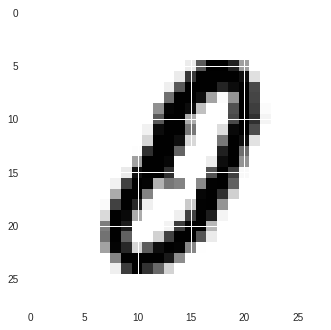

In [29]:
b = mnist.train.next_batch(1)
print (b[0].shape) #b[0] contains the image 
image = tf.reshape(b[0], [-1,28,28,1])
print (image)
my_img = image.eval() #here is your image Tensor
my_i = my_img.squeeze()
plt.imshow(my_i, cmap='gray_r')
plt.show()

## Training


In [14]:
batchSize = 50
for i in range(1000):
    batch = mnist.train.next_batch(batchSize)
    trainingInputs = batch[0].reshape([batchSize,28,28,1])
    trainingLabels = batch[1]
    if i%10 == 0:
        summary = sess.run(merged, {x: trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        writer.add_summary(summary, i)
    if i%100 == 0:
        trainAccuracy = accuracy.eval(session=sess, feed_dict={x:trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        print ("step %d, training accuracy %g"%(i, trainAccuracy))
    trainStep.run(session=sess, feed_dict={x: trainingInputs, y_: trainingLabels, keep_prob: 0.5})

step 300, training accuracy 0.98
step 400, training accuracy 0.98
step 500, training accuracy 1
step 600, training accuracy 0.98
step 700, training accuracy 0.98
step 800, training accuracy 1
step 900, training accuracy 0.98
step 0, training accuracy 0.16


## Testing

In [15]:
testInputs = mnist.test.images.reshape([-1, 28, 28, 1])
testLabels = mnist.test.labels
acc = accuracy.eval(feed_dict = {x: testInputs, y_: testLabels, keep_prob: 1.0})
print("testing accuracy: {}".format(acc))

testing accuracy: 0.982200026512146
